<a href="https://colab.research.google.com/github/Sohammhatre10/AstronomicalDataAnalysis/blob/main/AstronomicalImageAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Use the FITS File (Flexible Image Transport Systems)
The astronomical data is fetched by the FITS and Astroquery

In [25]:
!pip install --upgrade astroquery

*Use the internet observatory* - [Sky view](https://skyview.gsfc.nasa.gov/current/cgi/query.pl)

In [37]:
import matplotlib.pyplot as plt
from astroquery.skyview import SkyView as sky

In [39]:
hdu=sky.get_images("M31", "SDSSg")[0][0]

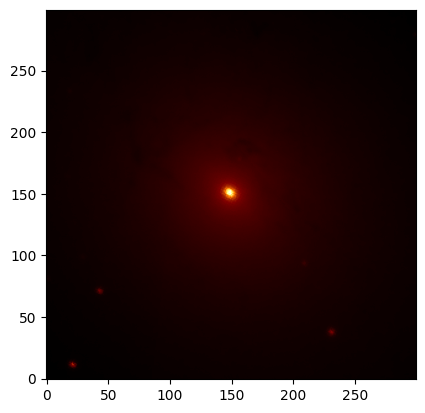

In [69]:
 andromeda_sdssg_pixels=hdu.data
 plt.imshow(andromeda_sdssg_pixels, cmap="afmhot", origin="lower")

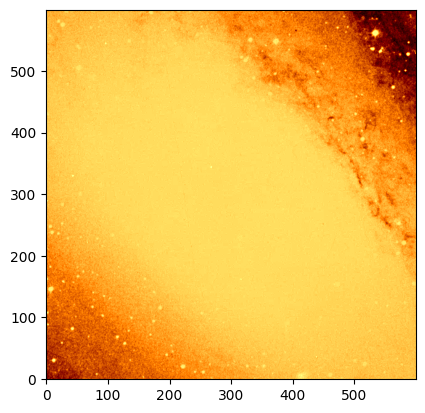

In [70]:
hdu_dss = sky.get_images(position = "M31", survey = "DSS", pixels = (600,600))[0][0]
andromeda_dss1_pixels = hdu_dss.data
plt.imshow(andromeda_dss1_pixels, cmap = "afmhot", origin="lower")

In [60]:
import astropy.units as Units

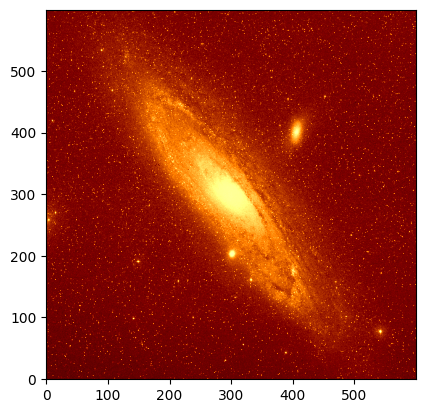

In [68]:
hdu_dss1blue = sky.get_images(position = "M31", survey = "DSS1 Blue", pixels = 600, radius = 150*Units.arcmin)[0][0]
andromeda_dss_1_blue = hdu_dss1blue.data
plt.imshow(andromeda_dss_1_blue, cmap="afmhot", origin="lower")

Step 5 - Pixel Scaling and information gathering

In [71]:
import numpy as np

In [78]:
print(f"Minimum pixel value is {np.min(andromeda_sdssg_pixels)}")
print(f"Maximum pixel value is {np.max(andromeda_sdssg_pixels)}")
print(f"Mean pixel value is {np.mean(andromeda_sdssg_pixels)}")
print(f"STD of the pixel value is {np.std(andromeda_sdssg_pixels)}")


Minimum pixel value is 5.359375
Maximum pixel value is 178.0
Mean pixel value is 13.329444885253906
STD of the pixel value is 6.3922271728515625


We'll plot the histogram for understanding the distribution of data along the image and check for noise and variations

Flat in matplotlib helps in converting 2D values to 1D
Bins are used in Digital to analog conversion

(array([3.0250e+03, 1.0787e+04, 2.0618e+04, 1.6363e+04, 1.1202e+04,
        7.4240e+03, 5.4950e+03, 3.8600e+03, 2.7730e+03, 2.0410e+03,
        1.6910e+03, 1.1580e+03, 8.8600e+02, 6.2700e+02, 4.5800e+02,
        3.5800e+02, 2.6800e+02, 1.9400e+02, 1.6700e+02, 1.1500e+02,
        8.5000e+01, 6.3000e+01, 5.5000e+01, 3.6000e+01, 3.4000e+01,
        2.2000e+01, 1.8000e+01, 2.0000e+01, 1.8000e+01, 7.0000e+00,
        1.6000e+01, 7.0000e+00, 1.0000e+01, 5.0000e+00, 7.0000e+00,
        7.0000e+00, 4.0000e+00, 5.0000e+00, 7.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

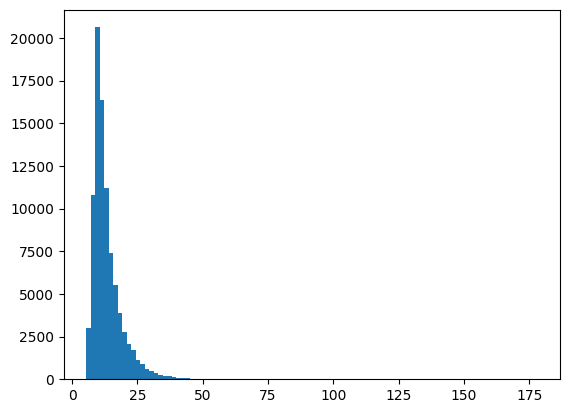

In [85]:
plt.hist(andromeda_sdssg_pixels.flat, bins=100)

In [90]:
def plot_img(image_array, title, color):
  plt.imshow(image_array, cmap=color, original="lower")
  plt.title(title)
  plt.axis("off")

In [87]:
def min_max_scaling(image_array):
  return (image_array-np.min(image_array))/(np.max(image_array)-np.min(image_array))

In [91]:
def compare_image(image_array, scaled_image_array, color):
  plt.subplot(1,1,2)
  plot_img(image_array, "Original Image", "gray")
  plt.subplot(1,2,2)
  plot_img(scaled_image_array, "Scaled Image", color)